<a href="https://colab.research.google.com/github/randyRivera0/LandUseAndWildlifeDLSemanticSegmentation/blob/main/LandUseAndWildlifeDLSemanticSegmentation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install ultralytics roboflow matplotlib inference ultralytics supervision roboflow

  Using cached requests-2.31.0-py3-none-any.whl.metadata (4.6 kB)
Using cached requests-2.31.0-py3-none-any.whl (62 kB)
  Attempting uninstall: requests
    Found existing installation: requests 2.32.3
    Uninstalling requests-2.32.3:
      Successfully uninstalled requests-2.32.3
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
google-colab 1.0.0 requires requests==2.32.3, but you have requests 2.31.0 which is incompatible.


In [ ]:
from IPython import display
import matplotlib.pyplot as plt
import os
import cv2
from roboflow import Roboflow
import glob
from google.colab import files
from IPython.display import Image as IPyImage, display
from ultralytics import YOLO
from PIL import Image
import requests
import supervision as sv
import torch
import ultralytics
from google.colab import userdata
from roboflow import Roboflow

In [ ]:
ultralytics.checks()
HOME = os.getcwd()

Ultralytics 8.3.15 🚀 Python-3.10.12 torch-2.4.1+cu121 CUDA:0 (Tesla T4, 15102MiB)
Setup complete ✅ (2 CPUs, 12.7 GB RAM, 29.7/112.6 GB disk)


In [ ]:
# display.clear_output()
!yolo mode=checks

Traceback (most recent call last):
  File "/usr/local/bin/yolo", line 8, in <module>
    sys.exit(entrypoint())
  File "/usr/local/lib/python3.10/dist-packages/ultralytics/cfg/__init__.py", line 739, in entrypoint
    raise ValueError(f"Invalid 'mode={mode}'. Valid modes are {MODES}.\n{CLI_HELP_MSG}")
ValueError: Invalid 'mode=<module 'ultralytics.utils.checks' from '/usr/local/lib/python3.10/dist-packages/ultralytics/utils/checks.py'>'. Valid modes are {'track', 'val', 'train', 'predict', 'export', 'benchmark'}.

    Arguments received: ['yolo', 'mode=checks']. Ultralytics 'yolo' commands use the following syntax:

        yolo TASK MODE ARGS

        Where   TASK (optional) is one of {'obb', 'segment', 'pose', 'detect', 'classify'}
                MODE (required) is one of {'track', 'val', 'train', 'predict', 'export', 'benchmark'}
                ARGS (optional) are any number of custom 'arg=value' pairs like 'imgsz=320' that override defaults.
                    See all ARGS at ht

In [ ]:
# Initialize Roboflow with your API key
ROBOFLOW_API_KEY = userdata.get('ROBOFLOW_API_KEY')
rf = Roboflow(api_key=ROBOFLOW_API_KEY)
# rf = Roboflow(api_key="oO7M6O03cXw3x36PVBxq") # Replace with your actual API key

# Avance de la primera semana

### Ejemplo

In [ ]:
# Access the existing project
project = rf.workspace("geckos-land").project("hard-hat-sample-5adtr")  # Replace with your project name

# Download the dataset (specify the version you want)
dataset = project.version(3).download("yolov11") # Adjust version number as needed

# Path to the images
image_dir = dataset.location

loading Roboflow workspace...
loading Roboflow project...


In [ ]:
!yolo task=detect mode=predict model=yolov8m.pt conf=0.25 data={image_dir}/data.yaml source="/content/Hard-Hat-Sample-3/test/images/000008_jpg.rf.dab1eb7417a4cb0e3ccd36c38ef9aa9a.jpg"

Ultralytics 8.3.15 🚀 Python-3.10.12 torch-2.4.1+cu121 CUDA:0 (Tesla T4, 15102MiB)
YOLOv8m summary (fused): 218 layers, 25,886,080 parameters, 0 gradients, 78.9 GFLOPs

image 1/1 /content/Hard-Hat-Sample-3/test/images/000008_jpg.rf.dab1eb7417a4cb0e3ccd36c38ef9aa9a.jpg: 640x640 6 persons, 1 sports ball, 37.5ms
Speed: 8.1ms preprocess, 37.5ms inference, 711.7ms postprocess per image at shape (1, 3, 640, 640)
Results saved to runs/detect/predict4
💡 Learn more at https://docs.ultralytics.com/modes/predict


In [ ]:
print(image_dir)

/content/Hard-Hat-Sample-3


In [ ]:
# Set the path to the specific image subdirectory
test_image_dir = os.path.join(image_dir, 'test')  # Change 'test' to 'train' or 'valid' if needed

# List all files in the test image directory
images = os.listdir(test_image_dir)

# Filter to include only image files (e.g., .jpg, .png)
image_files = [img for img in images if img.endswith(('.jpg', '.png', '.jpeg'))]

# Display some images
num_images_to_display = 5  # Number of images to display

for i in range(min(num_images_to_display, len(image_files))):
    img_path = os.path.join(test_image_dir, image_files[i])
    img = cv2.imread(img_path)

    if img is not None:
        plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
        plt.title(f"Image: {image_files[i]}")
        plt.axis('off')  # Hide axes
        plt.show()
    else:
        print(f"Could not read image: {img_path}")

In [ ]:
# Set the path to the specific image subdirectory
image_dir = 'content/runs/detect/predict'  # Change to your desired base path

# Use glob to list all jpg files in the specified directory
image_path_pattern = os.path.join(image_dir, '*.jpg')
image_files = glob.glob(image_path_pattern)

# Display some images
num_images_to_display = 5  # Number of images to display

for i in range(min(num_images_to_display, len(image_files))):
    img_path = image_files[i]
    img = cv2.imread(img_path)

    if img is not None:
        plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
        plt.title(f"Image: {os.path.basename(img_path)}")
        plt.axis('off')  # Hide axes
        plt.show()
    else:
        print(f"Could not read image: {img_path}")


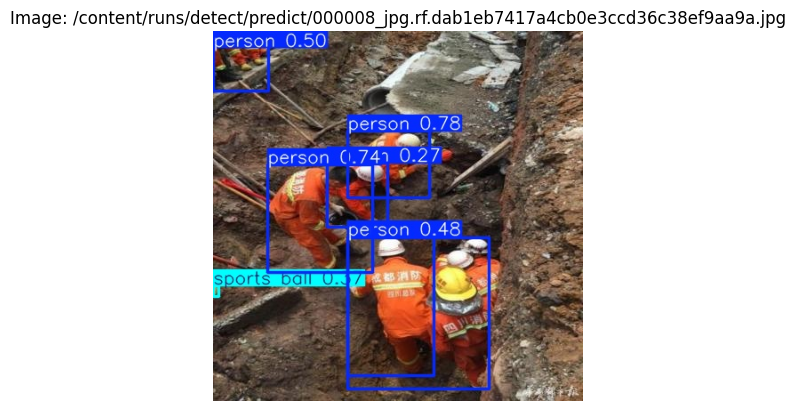

In [ ]:
# Set the path to the specific image subdirectory
image_dir = '/content/runs/detect/predict/'  # Change to your desired base path

# Use glob to list all jpg files in the specified directory
image_path_pattern = os.path.join(image_dir, '*.jpg')
image_files = glob.glob(image_path_pattern)

# Display some images
num_images_to_display = 5  # Number of images to display

for i in range(min(num_images_to_display, len(image_files))):
    img_path = image_files[i]
    img = cv2.imread(img_path)

    if img is not None:
        plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
        plt.title(f"Image: {img_path}")  # Show the full image path
        plt.axis('off')  # Hide axes
        plt.show()
    else:
        print(f"Could not read image: {img_path}")


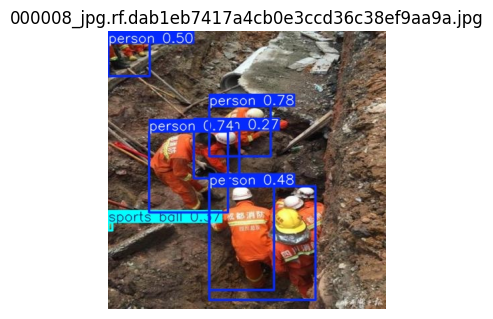

In [ ]:
# Set the directory path
directory_path = '/content/runs/detect/predict/'

# List all files in the directory
files = os.listdir(directory_path)

# Filter for image files (you can add more formats if needed)
image_files = [f for f in files if f.endswith(('.jpg', '.jpeg', '.png'))]

# Create a subplot for each image
plt.figure(figsize=(15, 15))
for i, image_file in enumerate(image_files):
    # Load the image
    image_path = os.path.join(directory_path, image_file)
    image = cv2.imread(image_path)

    # Convert the image from BGR to RGB format
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

    # Create a subplot
    plt.subplot(5, 5, i + 1)  # Adjust the number of rows/columns as needed
    plt.imshow(image)
    plt.axis('off')  # Turn off axis numbers and ticks
    plt.title(image_file)  # Optional: Show the filename as title

plt.tight_layout()
plt.show()


# Avance de la Semana 2

## Asignación:
Miguel Andrés Realpe Robalino: "Esta semana crea un dataset de iguanas. Para eso usa como base videos de dron que estan en la GPU de cidis. El acceso de anydesk es [privado]. Los videos estan em D:\Videos dron GALAPAGOS\Avistamiento Macrofauna Dron. Busca en los videos escenas que esten viendo directamente hacia abajo y selecciona unos 20 frames tratando de tener variedad de escenas (arena, roca, etc.). Crea un proyecto en roboflow y etiqueta con poligonos las iguanas en los frames y de alli crea un dataset."

## Resumen General
- Breve descripción de lo que se logró esta semana.

## Tareas Completadas
- [x] Crear Dataset de Iguanas
- [ ] Entrenar modelos con el Dataset

## Desafíos Enfrentados
- Hacen falta muchas más imágenes de Iguanas y animales en general. La mayoría de los videos son vistas aéreas muy alejadas con el dron. Como mucho sirve para el uso de suelo. Ataje este problema aumentando la data.

## Próximos Pasos
- Investigar sobre los distintos tipos de proyectos: Object detection, classification, instance segmentation, keypoint detection. Modelos más complejos y uso de suelo.


In [ ]:
labeled_images_dir = '/content/Hard-Hat-Sample-3/train/images'
unlabeled_images_dir = '/content/Hard-Hat-Sample-3/train/images'
labels_dir = '/content/Hard-Hat-Sample-3/train/labels'
labels = '/content/Hard-Hat-Sample-3/train/labels'

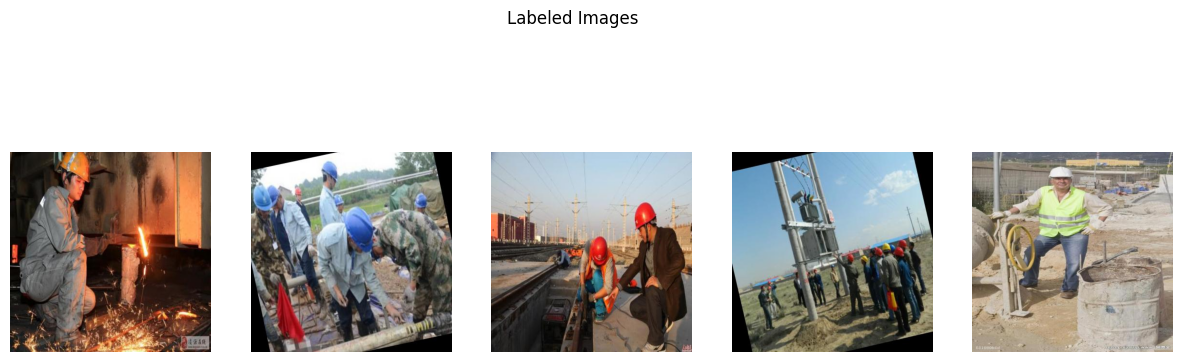

In [ ]:
def display_images(image_paths, title, num_images=5):
    plt.figure(figsize=(15, 5))
    for i, image_path in enumerate(image_paths[:num_images]):
        img = cv2.imread(image_path)
        img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
        plt.subplot(1, num_images, i + 1)
        plt.imshow(img)
        plt.axis('off')
    plt.suptitle(title)
    plt.show()

# Get the image paths
labeled_images = [os.path.join(labeled_images_dir, img) for img in os.listdir(labeled_images_dir)]
unlabeled_images = [os.path.join(unlabeled_images_dir, img) for img in os.listdir(unlabeled_images_dir)]

# Display images
display_images(labeled_images, 'Labeled Images')


## Training custom dataset

In [ ]:
!mkdir {HOME}/datasets
%cd {HOME}/datasets

mkdir: cannot create directory ‘/content/datasets’: File exists
/content/datasets


In [ ]:
project = rf.workspace("geckos-land").project("galapagos-oxbrc")
version = project.version(3)
dataset = version.download("yolov11")

loading Roboflow workspace...
loading Roboflow project...


In [ ]:
labeled_images_dir = '/content/Galapagos-1/train/images'
labels_dir = '/content/Galapagos-1/train/labels'

In [ ]:
%cd {HOME}

!yolo task=detect mode=train model=yolo11s.pt data={dataset.location}/data.yaml epochs=10 imgsz=640 plots=True

/content
Ultralytics 8.3.15 🚀 Python-3.10.12 torch-2.4.1+cu121 CUDA:0 (Tesla T4, 15102MiB)
engine/trainer: task=detect, mode=train, model=yolo11s.pt, data=/content/datasets/Galapagos-3/data.yaml, epochs=10, time=None, patience=100, batch=16, imgsz=640, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=train2, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, embed=None, show=False, save_frames=False, save_txt=False, save_conf=False, save_crop=False, show_labels=True, sho

In [ ]:
!ls {HOME}/runs/detect/train/

args.yaml					    labels.jpg	  train_batch0.jpg
confusion_matrix_normalized.png			    P_curve.png   train_batch1.jpg
confusion_matrix.png				    PR_curve.png  train_batch2.jpg
events.out.tfevents.1729217520.83608fd6d994.5036.0  R_curve.png   val_batch0_labels.jpg
F1_curve.png					    results.csv   val_batch0_pred.jpg
labels_correlogram.jpg				    results.png   weights


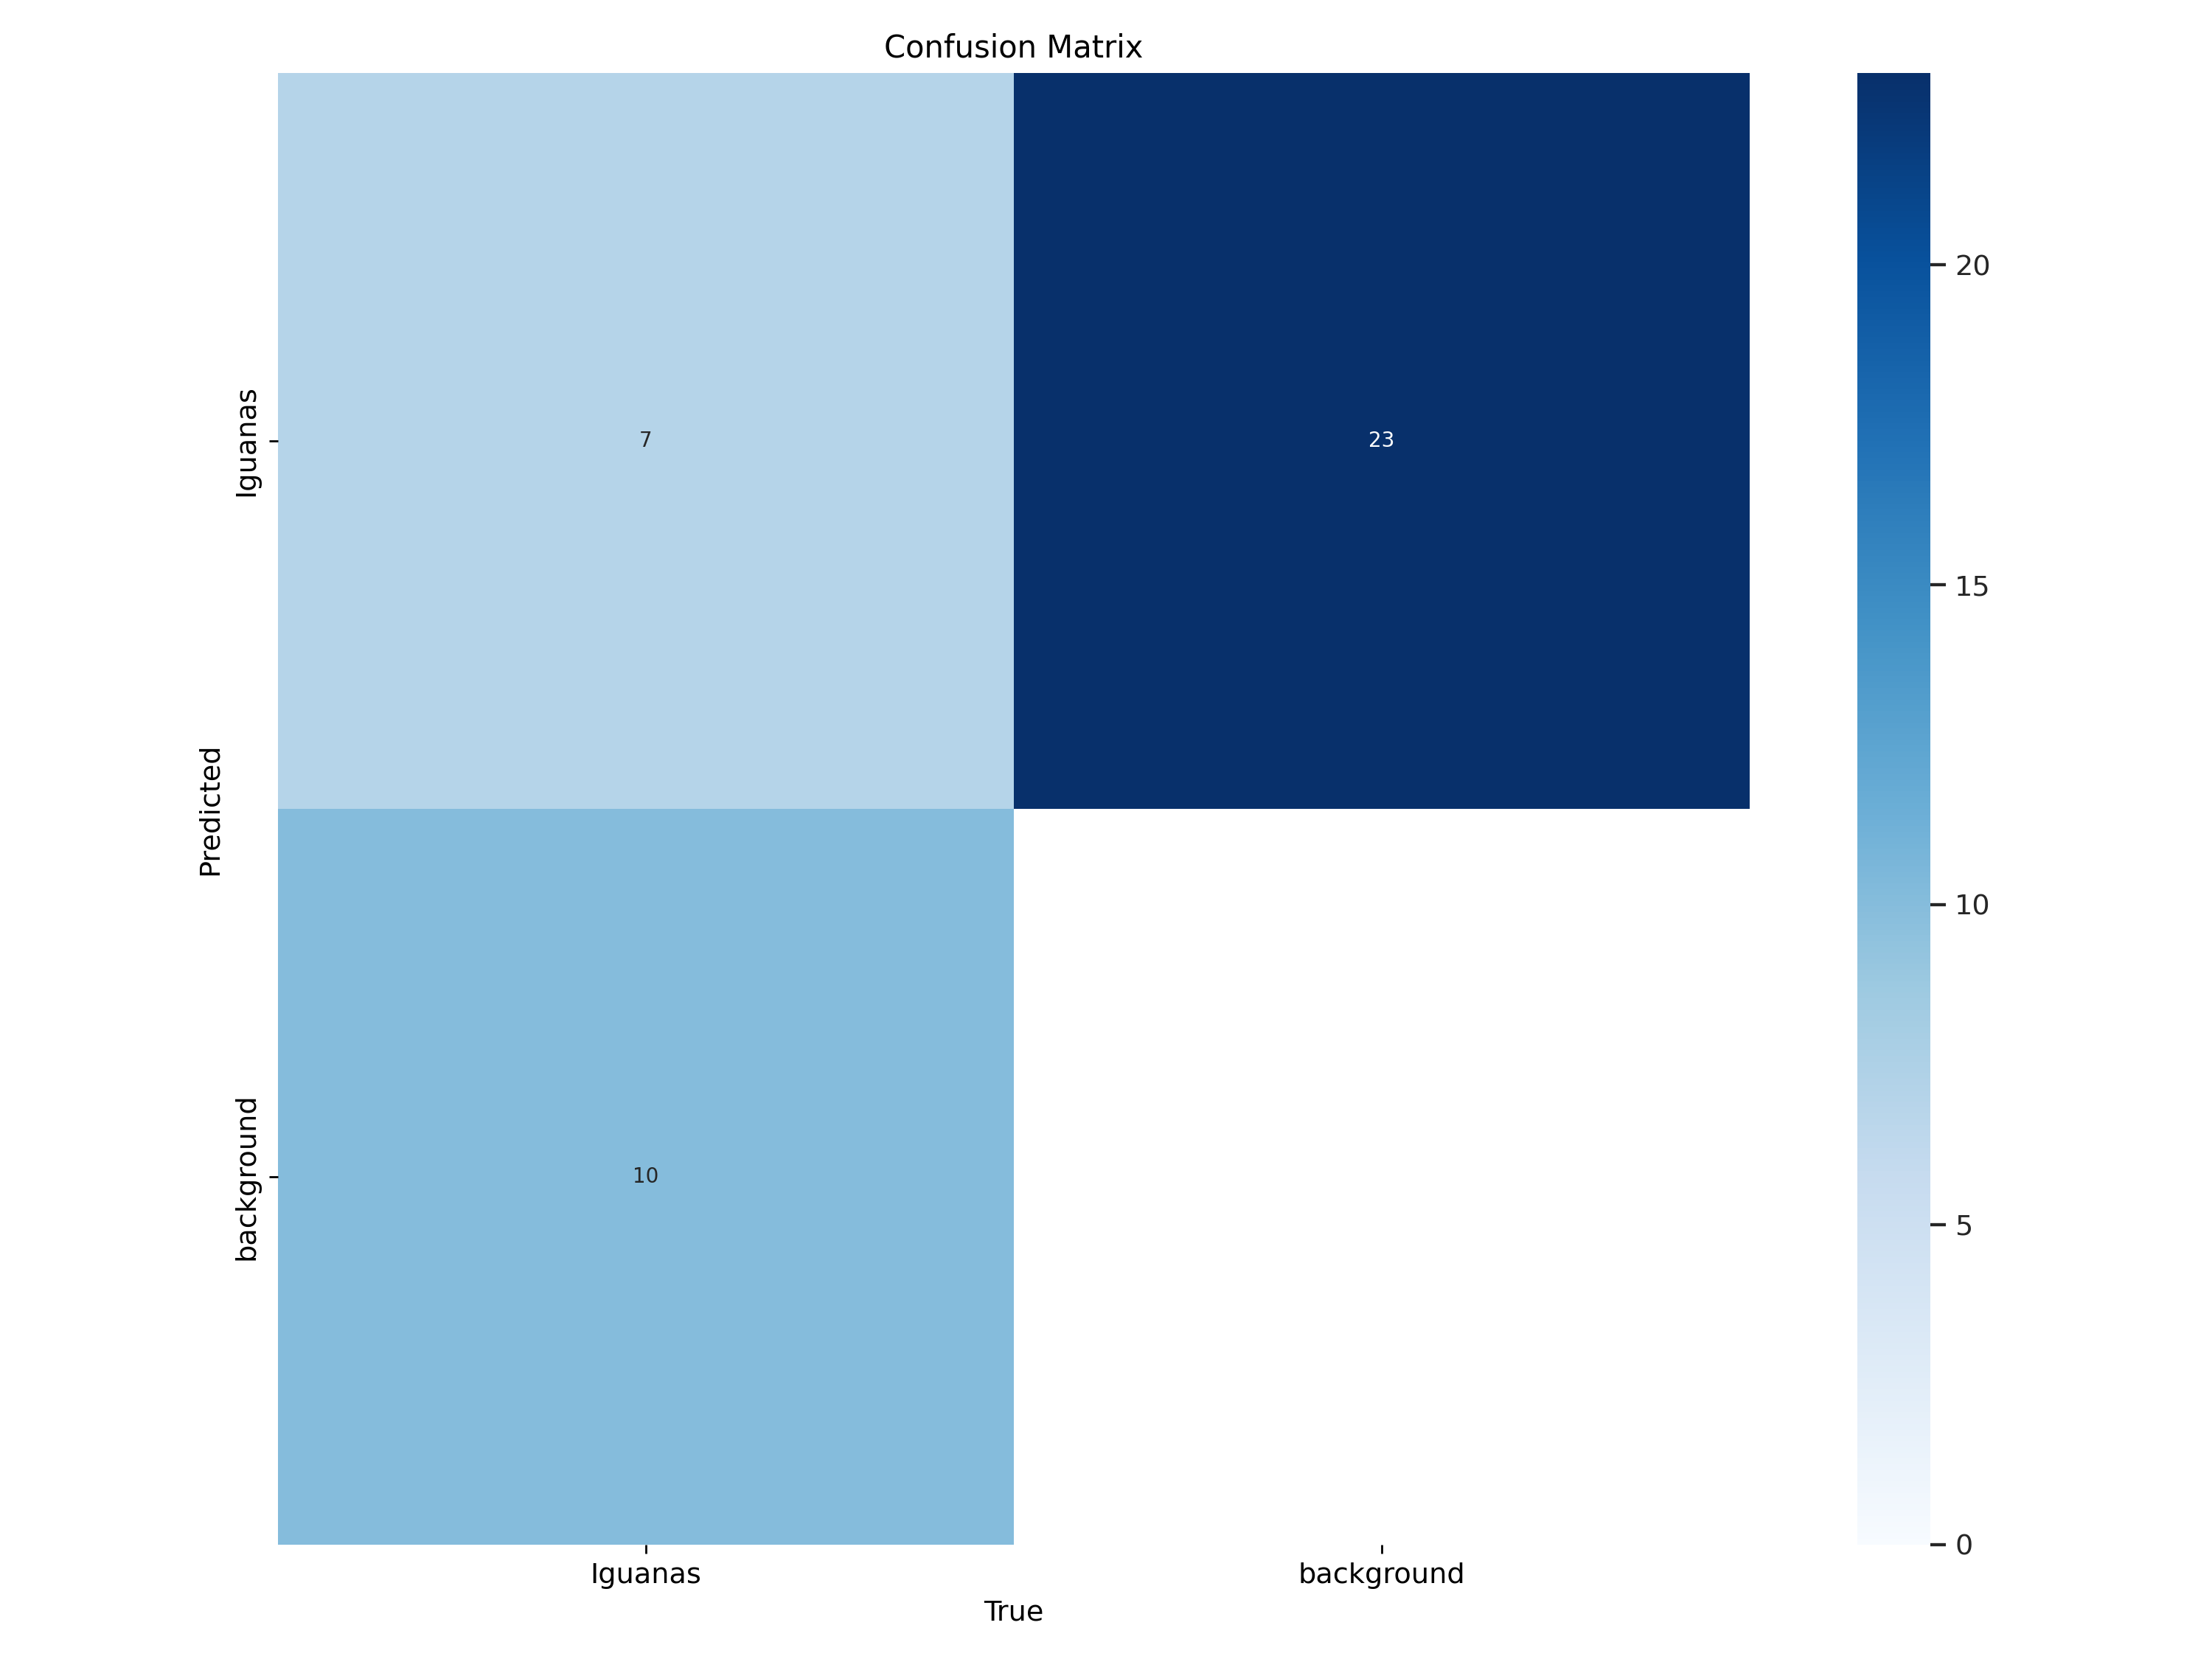

In [ ]:
IPyImage(filename=f'{HOME}/runs/detect/train/confusion_matrix.png', width=600)

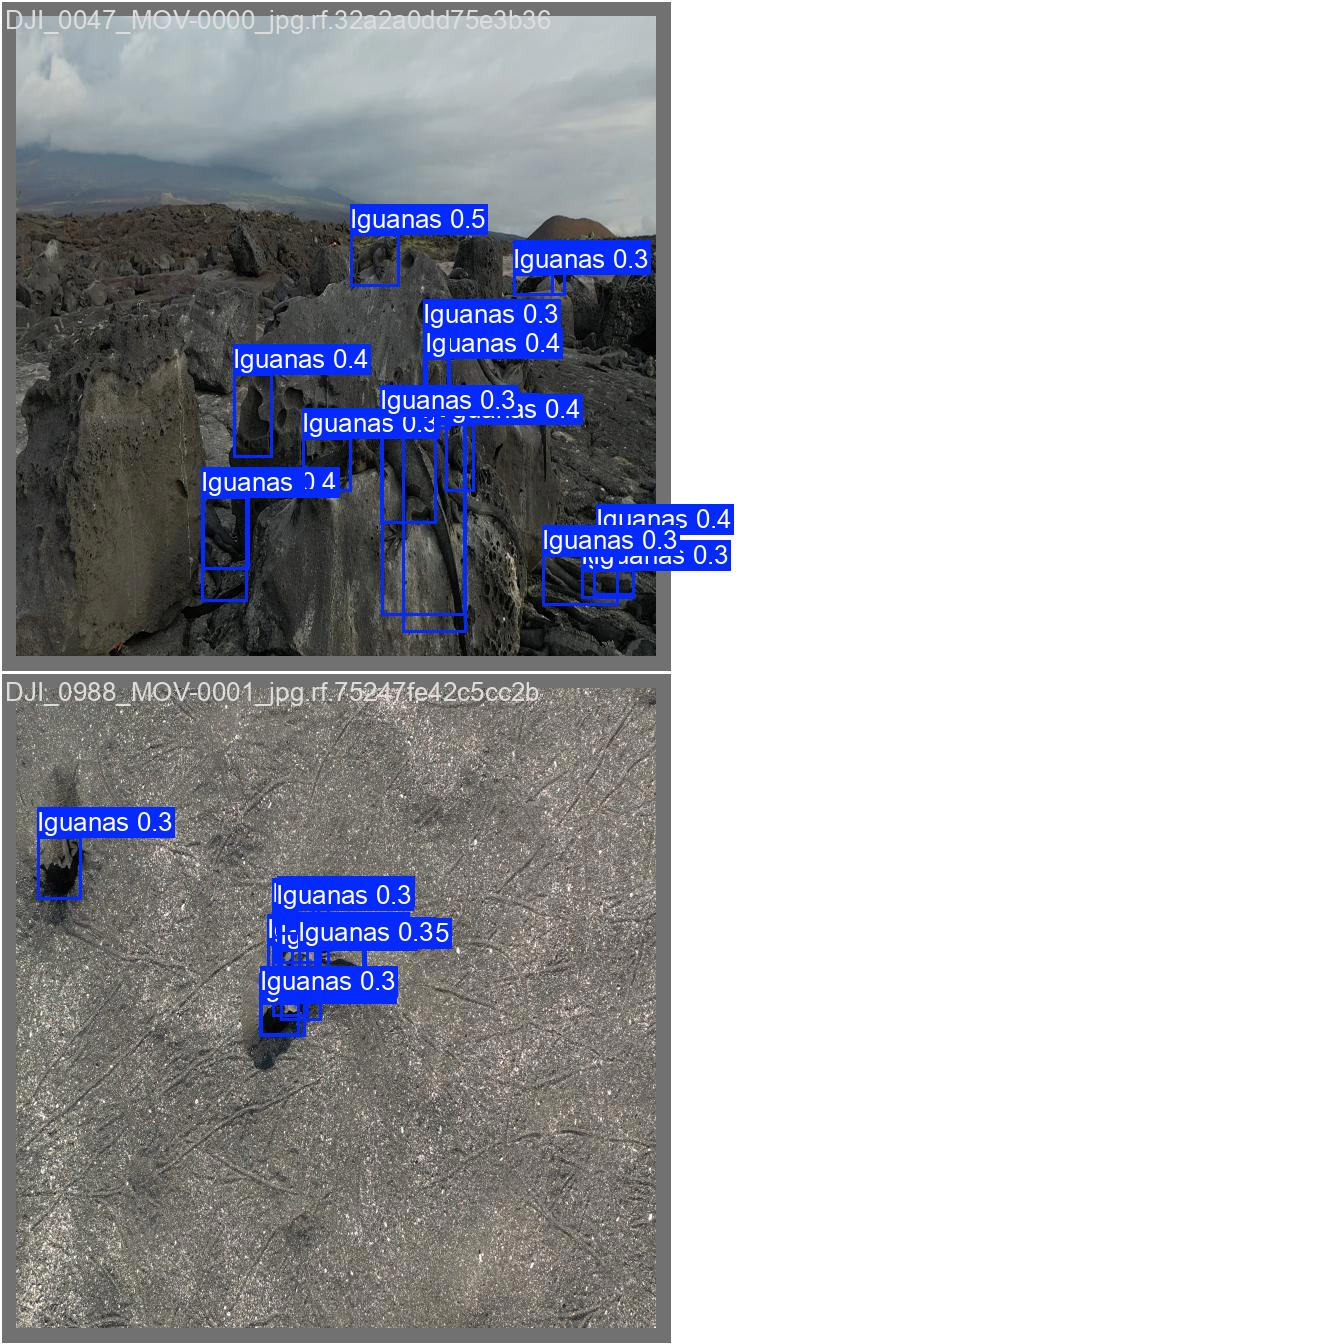

In [ ]:
IPyImage(filename=f'{HOME}/runs/detect/train/val_batch0_pred.jpg', width=600)

### Inference with custom model

In [ ]:
!yolo task=detect mode=predict model={HOME}/runs/detect/train/weights/best.pt conf=0.25 source={dataset.location}/test/images save=True

Ultralytics 8.3.15 🚀 Python-3.10.12 torch-2.4.1+cu121 CUDA:0 (Tesla T4, 15102MiB)
YOLO11s summary (fused): 238 layers, 9,413,187 parameters, 0 gradients, 21.3 GFLOPs

image 1/2 /content/datasets/Galapagos-3/test/images/DJI_0485_MOV-0000_jpg.rf.78ba6f1838311513ab4a019a2d572e97.jpg: 640x640 94 Iguanass, 15.6ms
image 2/2 /content/datasets/Galapagos-3/test/images/gal_PNG.rf.9b95a93afb97d7cb18c87c5f2ca7ceb0.jpg: 640x640 5 Iguanass, 15.6ms
Speed: 2.7ms preprocess, 15.6ms inference, 290.9ms postprocess per image at shape (1, 3, 640, 640)
Results saved to runs/detect/predict5
💡 Learn more at https://docs.ultralytics.com/modes/predict


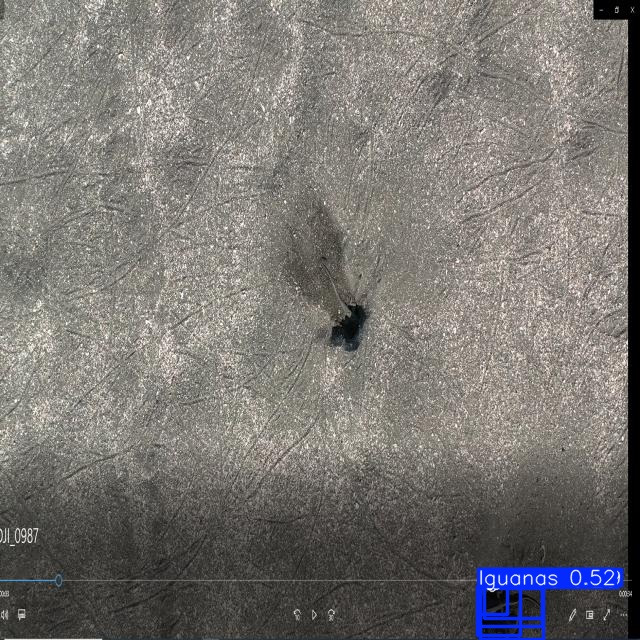

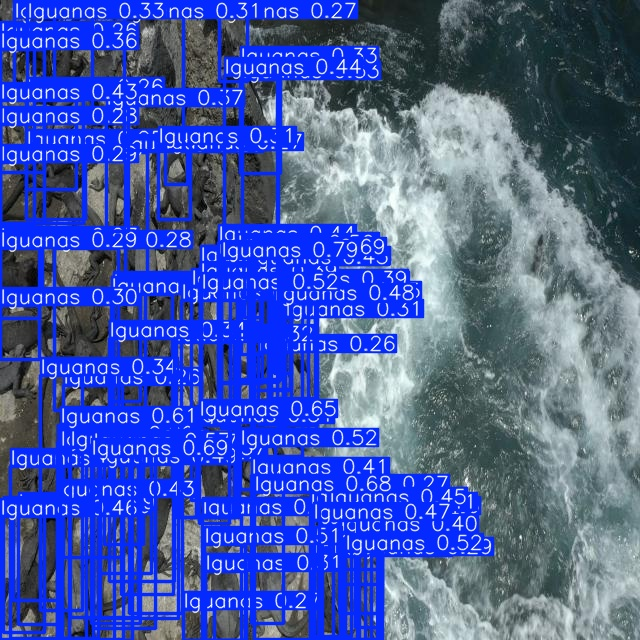

In [ ]:
import glob
import os
from IPython.display import Image as IPyImage, display

latest_folder = max(glob.glob('/content/runs/detect/predict*/'), key=os.path.getmtime)
for img in glob.glob(f'{latest_folder}/*.jpg')[:3]:
    display(IPyImage(filename=img, width=600))
    print("\n")

### Deploy model on Roboflow